<a href="https://colab.research.google.com/github/Skyresist/FIT-Competition-DataBASE/blob/main/dataBASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install memory_profiler

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import ElasticNet

# Tuning
from sklearn.model_selection import GridSearchCV

# Ensembling
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Evaluating
from sklearn.metrics import mean_squared_error, r2_score

# Efficiency Analysis
import time
from memory_profiler import memory_usage

# Global Air Pollution Dataset



### Importing and Cleaning

In [ ]:
data1 = pd.read_csv("https://raw.githubusercontent.com/teresatendeas/fitcompetition2025/refs/heads/main/global%20air%20pollution%20dataset.csv")
data1.sample(10, random_state=325)

# The Air Quality Index (AQI) is a tool used to report daily air quality, indicating how clean or polluted the air is and the associated health risks
# Higher AQI value would mean more bad air ( Good > Moderate > Unhealthy for senstitive friend group > unhealthy > very unhealthy > Hazardous )
# CO is Carbon Monoxide , Ozone is ozone pollution , NO2 is nitrogen dioxide , PM 2.5 is the AQI from particulate matter smaller than 2.5 microns

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
3069,India,Pallavaram,82,Moderate,1,Good,28,Good,2,Good,82,Moderate
15869,Chile,Curanilahue,66,Moderate,2,Good,8,Good,8,Good,66,Moderate
22055,Mexico,Tecamac,197,Unhealthy,2,Good,13,Good,12,Good,197,Unhealthy
13443,France,Ajaccio,44,Good,1,Good,44,Good,2,Good,30,Good
8588,NaN,Vico Equense,73,Moderate,1,Good,73,Moderate,0,Good,56,Moderate
15981,Colombia,Turbana,101,Unhealthy for Sensitive Groups,1,Good,18,Good,2,Good,101,Unhealthy for Sensitive Groups
4393,Thailand,Phayuha Khiri,57,Moderate,1,Good,17,Good,2,Good,57,Moderate
6305,Congo,Impfondo,73,Moderate,3,Good,11,Good,0,Good,73,Moderate
15979,Germany,Tubingen,36,Good,1,Good,26,Good,2,Good,36,Good
10326,Iran (Islamic Republic of),Shushtar,154,Unhealthy,1,Good,60,Moderate,1,Good,154,Unhealthy


In [ ]:
data1.info()
data1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


,0
Country,427
City,1
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [ ]:
data_no_null = data1.dropna()
data_no_null.isnull().sum()

,0
Country,0
City,0
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [ ]:
data_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23035 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23035 non-null  object
 1   City                23035 non-null  object
 2   AQI Value           23035 non-null  int64 
 3   AQI Category        23035 non-null  object
 4   CO AQI Value        23035 non-null  int64 
 5   CO AQI Category     23035 non-null  object
 6   Ozone AQI Value     23035 non-null  int64 
 7   Ozone AQI Category  23035 non-null  object
 8   NO2 AQI Value       23035 non-null  int64 
 9   NO2 AQI Category    23035 non-null  object
 10  PM2.5 AQI Value     23035 non-null  int64 
 11  PM2.5 AQI Category  23035 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.3+ MB


In [ ]:
new_table = data_no_null.groupby('Country', as_index=False)[
    ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
].mean()

new_table.rename(
    columns={
        'AQI Value': 'AQI Average Value',
        'CO AQI Value': 'CO AQI Average Value',
        'Ozone AQI Value': 'Ozone AQI Average Value',
        'NO2 AQI Value': 'NO2 AQI Average Value',
        'PM2.5 AQI Value': 'PM2.5 AQI Average Value'
    },
    inplace=True
)

new_table.head()


,Country,AQI Average Value,CO AQI Average Value,Ozone AQI Average Value,NO2 AQI Average Value,PM2.5 AQI Average Value
0,Afghanistan,95.959184,0.591837,40.183673,0.020408,95.918367
1,Albania,68.250000,1.000000,42.062500,0.718750,68.093750
2,Algeria,88.166667,1.916667,47.166667,9.333333,80.250000
3,Andorra,29.333333,0.666667,29.333333,0.000000,22.000000
4,Angola,83.925926,3.148148,22.703704,1.888889,81.925926


In [ ]:
new_table.describe()

,AQI Average Value,CO AQI Average Value,Ozone AQI Average Value,NO2 AQI Average Value,PM2.5 AQI Average Value
count,175.000000,175.000000,175.000000,175.000000,175.000000
mean,72.310236,1.366965,33.257583,2.091383,69.752213
std,44.577805,2.143053,22.975438,7.092722,45.209549
min,16.000000,0.000000,0.000000,0.000000,6.000000
25%,43.659844,0.807932,20.095238,0.162281,42.157895
50%,62.692308,1.000000,27.333333,0.787879,61.867347
75%,88.009259,1.363636,40.099901,2.260417,87.704710
max,421.000000,27.000000,159.666667,91.000000,415.000000


### Exploratory Data Analysis

In [ ]:
pollutants = [
    ('AQI Average Value', 'Average Overall AQI by Country'),
    ('CO AQI Average Value', 'Average CO AQI by Country'),
    ('Ozone AQI Average Value', 'Average Ozone AQI by Country'),
    ('NO2 AQI Average Value', 'Average NO2 AQI by Country'),
    ('PM2.5 AQI Average Value', 'Average PM2.5 AQI by Country')
]

for col, title in pollutants:
    fig = px.choropleth(
        new_table,
        locations="Country",
        locationmode="country names",
        color=col,
        hover_name="Country",
        color_continuous_scale=px.colors.sequential.Plasma,
        title=title
    )
    fig.show()

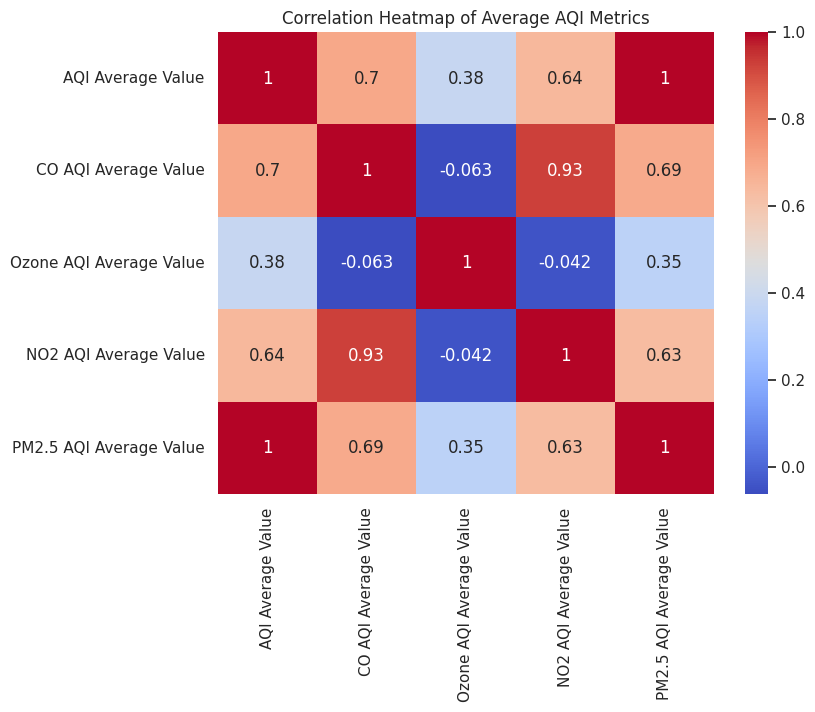

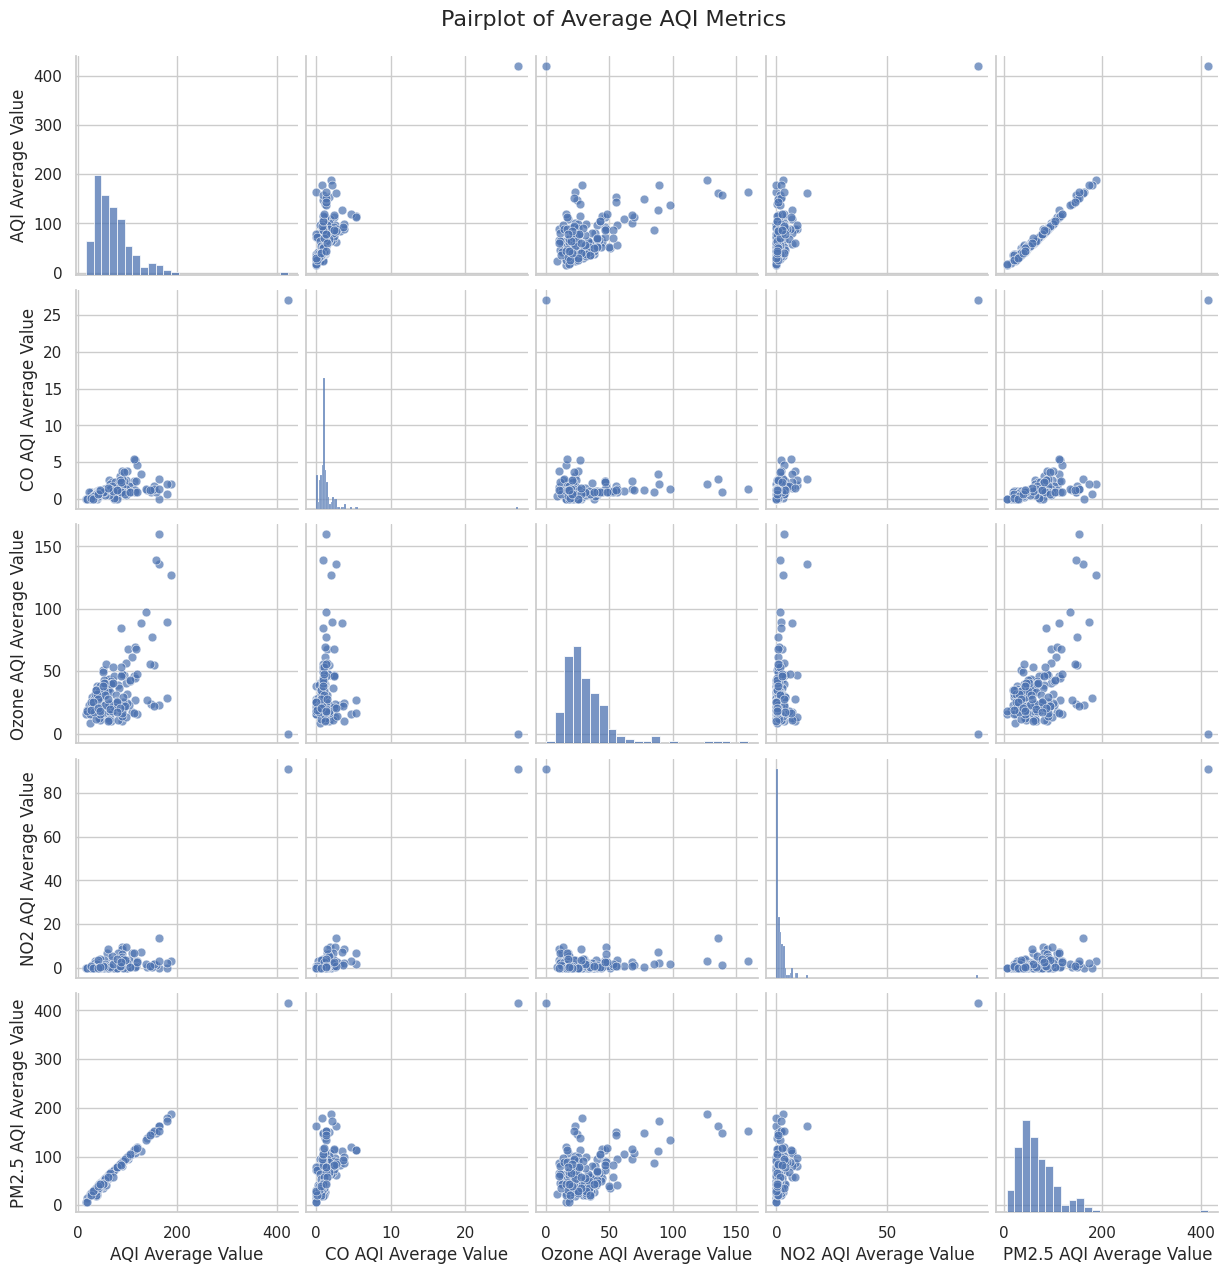

In [ ]:
sns.set(style="whitegrid", context="notebook")

pair_data = new_table.drop(columns="Country")

# plot the heatmap in one figure
plt.figure(figsize=(8,6))
sns.heatmap(pair_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Average AQI Metrics")
plt.show()

# plot the pairplot separately
g = sns.pairplot(
    pair_data,
    height=2.5,
    plot_kws={"s": 40, "alpha": 0.7}
)
plt.suptitle("Pairplot of Average AQI Metrics", fontsize=16, y=1.02)
plt.show()

In [ ]:
pollutant_melt = new_table.melt(
    id_vars="Country",
    value_vars=[
        'CO AQI Average Value',
        'Ozone AQI Average Value',
        'NO2 AQI Average Value',
        'PM2.5 AQI Average Value'
    ],
    var_name="Pollutant",
    value_name="Average AQI"
)

fig = px.bar(
    pollutant_melt,
    x="Average AQI",
    y="Country",
    color="Pollutant",
    orientation="h",
    title="Average AQI of Pollutants by Country (Interactive)",
    height=1200
)
fig.show()

# Sustainable Energy Dataset

### Importing and Cleaning

In [ ]:
data2 = pd.read_csv("https://raw.githubusercontent.com/teresatendeas/fitcompetition2025/refs/heads/main/global-data-on-sustainable-energy%20(1).csv")
data2.sample(10, random_state=325)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
1341,Greece,2017,100.000000,100.0,NaN,NaN,16.38,41.38,0.0,13.80,...,30131.8850,3.14,66800.003050,14.015645,1.092149,18536.190720,81,131957.0,39.074208,21.824312
361,Belize,2004,82.680980,82.6,112.81,NaN,32.02,0.10,0.0,0.06,...,8929.1455,5.39,439.999998,NaN,4.789941,3802.263160,17,22966.0,17.189877,-88.497650
2486,Norway,2014,100.000000,100.0,NaN,NaN,56.90,3.00,0.0,137.94,...,105633.7500,3.77,39110.000610,68.887280,1.969544,97019.182750,15,323802.0,60.472024,8.468946
2466,North Macedonia,2015,100.000000,73.1,NaN,NaN,23.91,3.62,0.0,2.03,...,13986.5480,3.55,7409.999847,18.564972,3.855865,4861.553971,83,25713.0,41.608635,21.745275
702,Chile,2009,99.593660,100.0,361.58,56220000.0,31.53,32.12,NaN,24.57,...,21051.6780,3.61,65449.996950,21.777431,-1.564239,10208.907970,26,756096.0,-35.675147,-71.542969
3300,Tonga,2008,91.219430,55.2,1.07,NaN,1.99,0.05,0.0,0.00,...,5056.3520,3.21,129.999995,NaN,4.750170,3331.546555,147,747.0,-21.178986,-175.198242
1069,Equatorial Guinea,2019,66.600044,24.0,93.76,NaN,6.58,0.95,0.0,0.45,...,17644.6930,3.01,5349.999905,NaN,-5.978937,8419.933336,50,28051.0,1.650801,10.267895
2050,Maldives,2012,99.386670,95.9,7.09,30000.0,1.20,0.39,0.0,0.00,...,16088.8530,2.40,1139.999986,NaN,2.517384,7265.723399,"1,802",298.0,3.202778,73.220680
1127,Eswatini,2014,65.000000,46.3,154.25,NaN,71.67,0.04,0.0,0.61,...,5096.1387,4.74,750.000000,NaN,0.923231,4039.159341,67,17364.0,-26.522503,31.465866
1308,Ghana,2005,41.250000,9.5,54.36,350000.0,61.43,1.10,0.0,5.58,...,1893.7173,3.64,7039.999962,NaN,5.900004,492.544056,137,238533.0,7.946527,-1.023194


In [ ]:
data2 = data2[data2['Year'] == 2020]
data2 = data2[['Entity', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Primary energy consumption per capita (kWh/person)']]
data2 = data2.rename(columns={'Entity': 'Country'})
data2.head()

,Country,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Primary energy consumption per capita (kWh/person)
20,Afghanistan,0.12,0.0,0.68,702.888
41,Albania,0.00,0.0,5.31,11158.003
62,Algeria,72.01,0.0,0.72,14933.807
83,Angola,4.49,0.0,12.10,3527.160
104,Antigua and Barbuda,0.31,0.0,0.02,27785.227


In [ ]:
data2.describe()

,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Primary energy consumption per capita (kWh/person)
count,174.000000,169.000000,174.000000,175.000000
mean,82.582701,13.186982,40.063448,24077.910855
std,444.797952,72.754233,185.960544,31690.339816
min,0.000000,0.000000,0.000000,0.000000
25%,0.415000,0.000000,0.210000,3195.263850
50%,3.415000,0.000000,2.935000,13816.492000
75%,29.962500,0.000000,14.655000,29402.981000
max,5184.130000,789.880000,2184.940000,184074.560000


### Exploratory Data Analysis

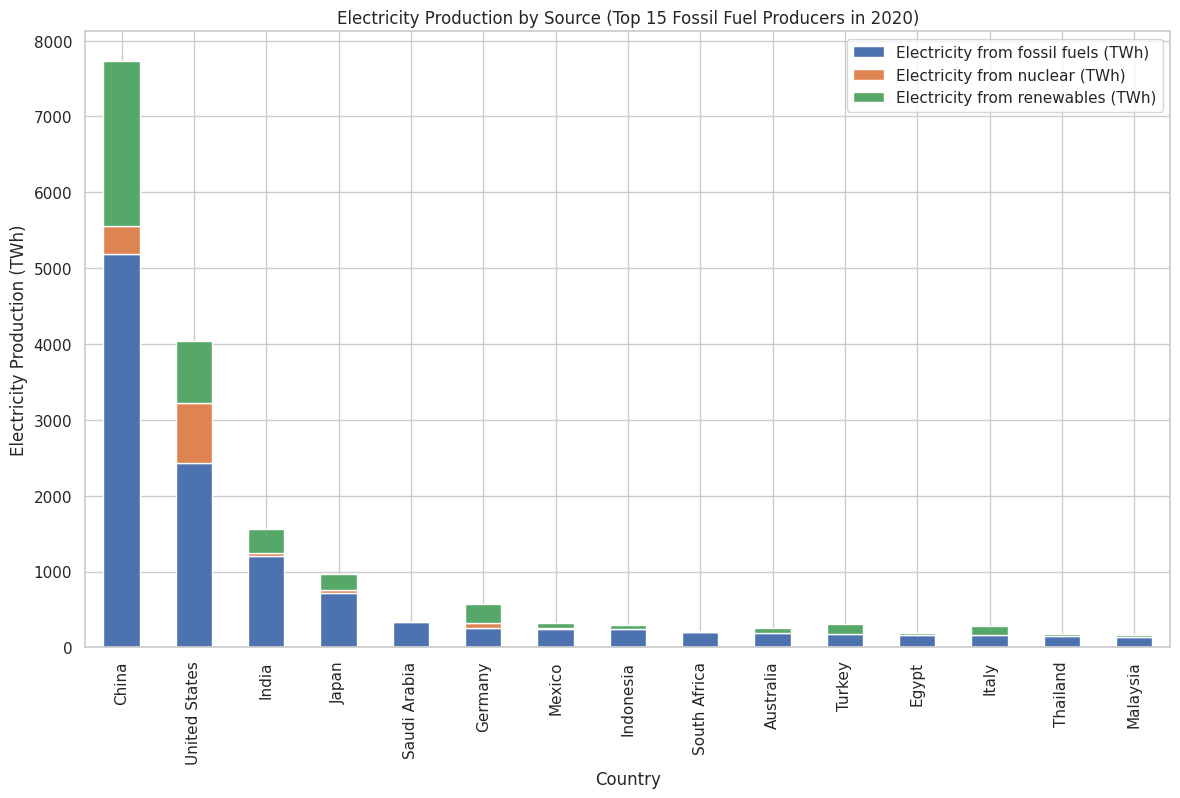

In [ ]:
top_countries = data2.sort_values(by='Electricity from fossil fuels (TWh)', ascending=False).head(15)

top_countries.set_index("Country")[[
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)'
]].plot(kind='bar', stacked=True, figsize=(14,8))

plt.ylabel('Electricity Production (TWh)')
plt.title('Electricity Production by Source (Top 15 Fossil Fuel Producers in 2020)')
plt.show()

In [ ]:
fig = px.choropleth(
    data2,
    locations="Country",
    locationmode="country names",
    color="Primary energy consumption per capita (kWh/person)",
    color_continuous_scale=px.colors.sequential.YlGnBu,
    title="Primary Energy Consumption per Capita (kWh/person) in 2020"
)
fig.show()

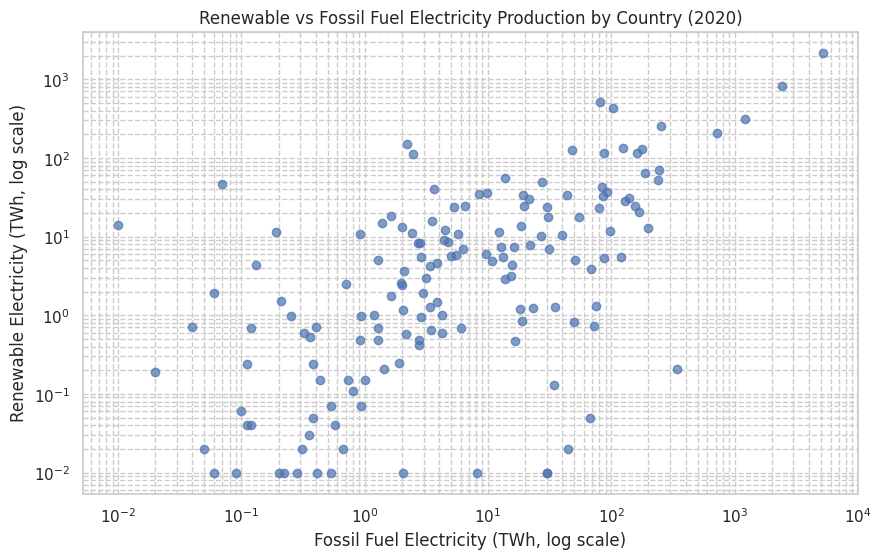

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(
    data2['Electricity from fossil fuels (TWh)'],
    data2['Electricity from renewables (TWh)'],
    alpha=0.7
)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Fossil Fuel Electricity (TWh, log scale)')
plt.ylabel('Renewable Electricity (TWh, log scale)')
plt.title('Renewable vs Fossil Fuel Electricity Production by Country (2020)')
plt.grid(True, which="both", ls="--")
plt.show()

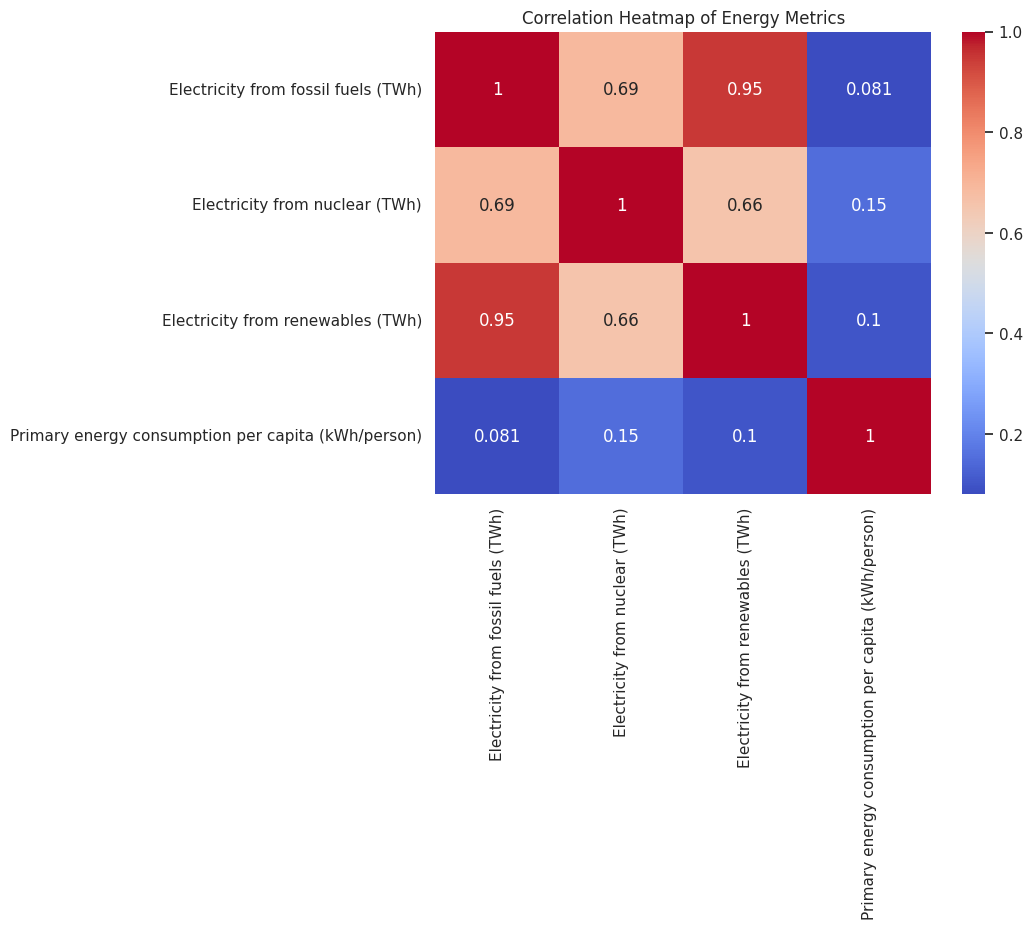

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(
    data2.drop(columns="Country").corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap of Energy Metrics")
plt.show()

# Merging

In [ ]:
df = pd.merge(new_table, data2, on='Country', how='inner')
df.head()

,Country,AQI Average Value,CO AQI Average Value,Ozone AQI Average Value,NO2 AQI Average Value,PM2.5 AQI Average Value,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Primary energy consumption per capita (kWh/person)
0,Afghanistan,95.959184,0.591837,40.183673,0.020408,95.918367,0.12,0.00,0.68,702.888
1,Albania,68.250000,1.000000,42.062500,0.718750,68.093750,0.00,0.00,5.31,11158.003
2,Algeria,88.166667,1.916667,47.166667,9.333333,80.250000,72.01,0.00,0.72,14933.807
3,Angola,83.925926,3.148148,22.703704,1.888889,81.925926,4.49,0.00,12.10,3527.160
4,Argentina,28.235294,0.352941,15.485294,1.544118,24.867647,91.58,10.06,37.05,19314.066


In [ ]:
features = ['CO AQI Average Value', 'Ozone AQI Average Value', 'NO2 AQI Average Value',	'PM2.5 AQI Average Value',	'Electricity from fossil fuels (TWh)',	'Electricity from nuclear (TWh)',	'Electricity from renewables (TWh)',	'Primary energy consumption per capita (kWh/person)']
target = 'AQI Average Value'

X = df[features]
y = df[target]



In [ ]:
X = X.fillna(0)
y = y.fillna(0)

# Preprocessing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 123
Testing set size: 31


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Development and Evaluation

### 1. Support Vector Regression

In [ ]:
# Define the SVR model
svr = SVR()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

# Perform GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
# Get the best SVR model
best_svr_model = SVR(C=10, gamma='scale', kernel='linear')
best_svr_model.fit(X_train_scaled, y_train)

# Evaluate the best model on the training dataset
y_train_pred_svr = best_svr_model.predict(X_train_scaled)

rmse_svr_train = np.sqrt(mean_squared_error(y_train, y_train_pred_svr))
r2_svr_train = r2_score(y_train, y_train_pred_svr)

print(f"SVR - Training Root Mean Squared Error: {rmse_svr_train:.4f}")
print(f"SVR - Training R-squared: {r2_svr_train:.4f}")

# Evaluate the best model on the test set
y_pred_svr = best_svr_model.predict(X_test_scaled)

rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - Test Root Mean Squared Error: {rmse_svr}")
print(f"SVR - Test R-squared: {r2_svr}")

SVR - Training Root Mean Squared Error: 3.0084
SVR - Training R-squared: 0.9936
SVR - Test Root Mean Squared Error: 4.4242590393498
SVR - Test R-squared: 0.9785311984399401


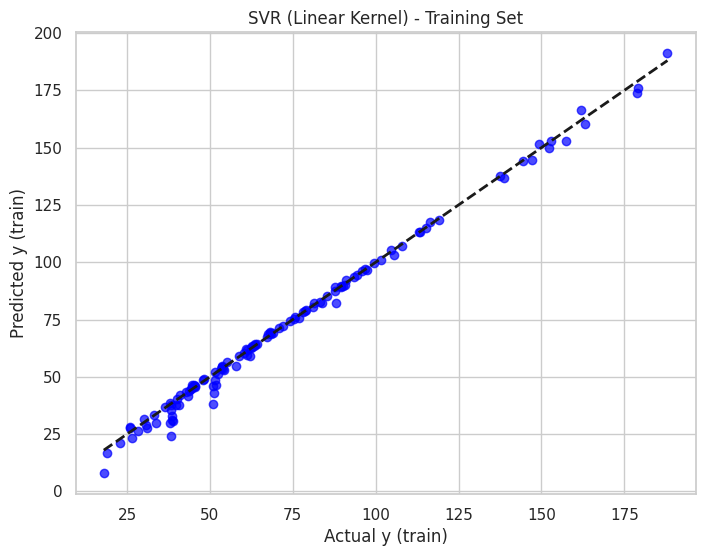

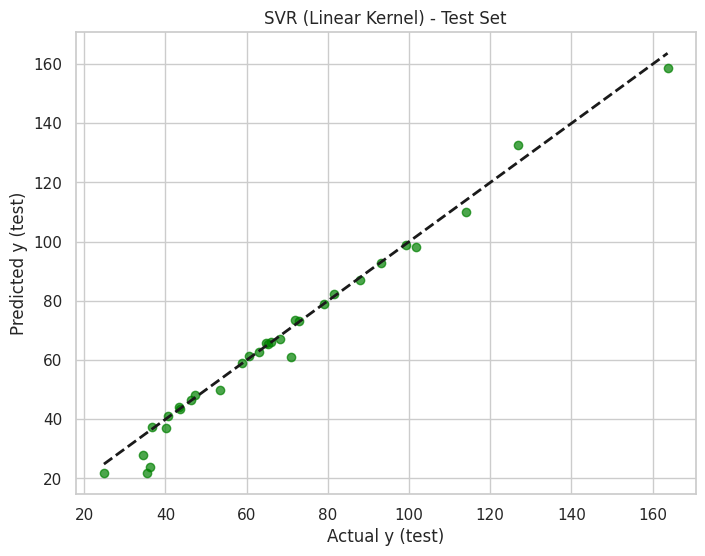

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred_svr, color="blue", alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("Actual y (train)")
plt.ylabel("Predicted y (train)")
plt.title("SVR (Linear Kernel) - Training Set")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, color="green", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual y (test)")
plt.ylabel("Predicted y (test)")
plt.title("SVR (Linear Kernel) - Test Set")
plt.grid(True)
plt.show()

#### SVR Efficienccy Analysis

In [ ]:
# Function to train and evaluate SVR with profiling
def train_and_evaluate_svr():
    # Start time
    start_train = time.time()

    # Training with memory usage tracking
    def train_model():
        global best_svr_model
        best_svr_model = SVR(C=10, gamma='scale', kernel='linear')
        best_svr_model.fit(X_train_scaled, y_train)

    mem_usage_train = memory_usage(train_model, max_iterations=1)
    end_train = time.time()

    # Evaluate on training data
    y_train_pred_svr = best_svr_model.predict(X_train_scaled)
    rmse_svr_train = np.sqrt(mean_squared_error(y_train, y_train_pred_svr))
    r2_svr_train = r2_score(y_train, y_train_pred_svr)

    print(f"SVR - Training RMSE: {rmse_svr_train:.4f}")
    print(f"SVR - Training R²: {r2_svr_train:.4f}")
    print(f"-----Efficiency Info-----")
    print(f"SVR - Training Time: {end_train - start_train:.4f} sec")
    print(f"SVR - Peak Training Memory: {max(mem_usage_train):.2f} MiB")
    print("------------------------")

    # Predicting with memory usage tracking
    def predict_model():
        global y_pred_svr
        y_pred_svr = best_svr_model.predict(X_test_scaled)

    start_test = time.time()
    mem_usage_test = memory_usage(predict_model, max_iterations=1)
    end_test = time.time()

    # Evaluate on test set
    rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
    r2_svr = r2_score(y_test, y_pred_svr)

    print(f"SVR - Test RMSE: {rmse_svr:.4f}")
    print(f"SVR - Test R²: {r2_svr:.4f}")
    print(f"-----Efficiency Info-----")
    print(f"SVR - Test Time: {end_test - start_test:.4f} sec")
    print(f"SVR - Peak Test Memory: {max(mem_usage_test):.2f} MiB")

# Run profiling function
train_and_evaluate_svr()


SVR - Training RMSE: 3.0084
SVR - Training R²: 0.9936
-----Efficiency Info-----
SVR - Training Time: 0.0903 sec
SVR - Peak Training Memory: 380.28 MiB
------------------------
SVR - Test RMSE: 4.4243
SVR - Test R²: 0.9785
-----Efficiency Info-----
SVR - Test Time: 0.0406 sec
SVR - Peak Test Memory: 380.50 MiB


### 2. Random Forest Regressor

In [ ]:
# Define the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
rf_param_grid = {
    'n_estimators': [100, 200, 400],
    'max_depth': [5, 10, 25],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

# Perform GridSearchCV
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Get the best parameters
best_rf_params = rf_grid_search.best_params_
print("\nBest Random Forest Hyperparameters:", best_rf_params)


Best Random Forest Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


In [ ]:
# Get the best Random Forest Regressor model
best_rf_model = RandomForestRegressor(n_estimators=400, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
best_rf_model.fit(X_train, y_train)

# Evaluate the best model on the training dataset
y_train_pred_rf = best_rf_model.predict(X_train)

rmse_rf_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
r2_rf_train = r2_score(y_train, y_train_pred_rf)

print(f"Random Forest - Training Root Mean Squared Error: {rmse_rf_train:.4f}")
print(f"Random Forest - Training R-squared: {r2_rf_train:.4f}")

# Evaluate the best model on the test set
y_pred_rf = best_rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Test Root Mean Squared Error: {rmse_rf}")
print(f"Random Forest - Test R-squared: {r2_rf}")

Random Forest - Training Root Mean Squared Error: 1.3376
Random Forest - Training R-squared: 0.9987
Random Forest - Test Root Mean Squared Error: 3.8456019488315265
Random Forest - Test R-squared: 0.9837798313161462


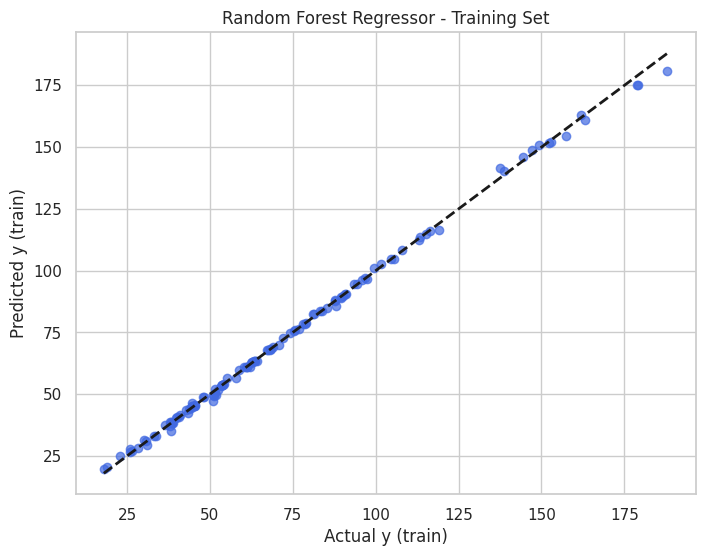

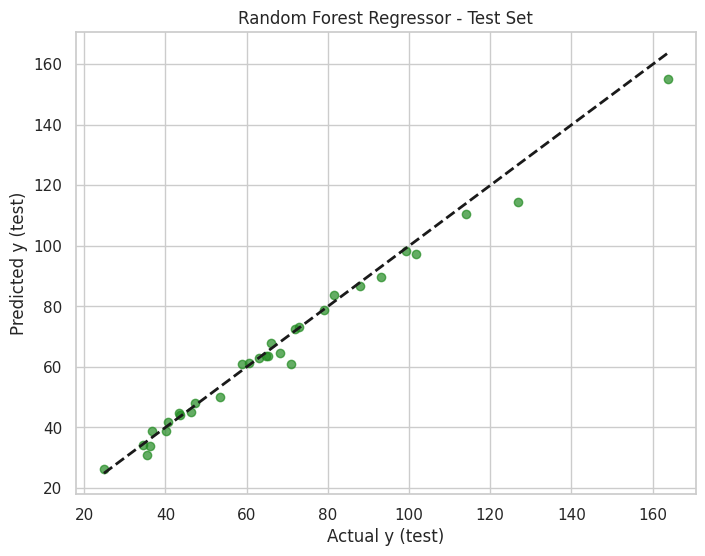

In [ ]:
# Training set: predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred_rf, color="royalblue", alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("Actual y (train)")
plt.ylabel("Predicted y (train)")
plt.title("Random Forest Regressor - Training Set")
plt.grid(True)
plt.show()

# Test set: predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, color="forestgreen", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual y (test)")
plt.ylabel("Predicted y (test)")
plt.title("Random Forest Regressor - Test Set")
plt.grid(True)
plt.show()

#### Random Forest Efficiency

In [ ]:
def train_and_evaluate_rf():
    # --- Training Phase ---
    start_train = time.time()

    def train_model():
        global best_rf_model
        best_rf_model = RandomForestRegressor(
            n_estimators=400, max_depth=10, min_samples_split=2,
            min_samples_leaf=1, random_state=42
        )
        best_rf_model.fit(X_train, y_train)

    mem_usage_train = memory_usage(train_model, max_iterations=1)
    end_train = time.time()

    y_train_pred_rf = best_rf_model.predict(X_train)
    rmse_rf_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
    r2_rf_train = r2_score(y_train, y_train_pred_rf)

    print(f"Random Forest - Training RMSE: {rmse_rf_train:.4f}")
    print(f"Random Forest - Training R²: {r2_rf_train:.4f}")
    print(f"-----Efficiency Info-----")
    print(f"Random Forest - Training Time: {end_train - start_train:.4f} sec")
    print(f"Random Forest - Peak Training Memory: {max(mem_usage_train):.2f} MiB")
    print("------------------------")

    # --- Testing Phase ---
    def predict_model():
        global y_pred_rf
        y_pred_rf = best_rf_model.predict(X_test)

    start_test = time.time()
    mem_usage_test = memory_usage(predict_model, max_iterations=1)
    end_test = time.time()

    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    r2_rf = r2_score(y_test, y_pred_rf)

    print(f"Random Forest - Test RMSE: {rmse_rf:.4f}")
    print(f"Random Forest - Test R²: {r2_rf:.4f}")
    print(f"-----Efficiency Info-----")
    print(f"Random Forest - Test Time: {end_test - start_test:.4f} sec")
    print(f"Random Forest - Peak Test Memory: {max(mem_usage_test):.2f} MiB")

# Run it
train_and_evaluate_rf()


Random Forest - Training RMSE: 1.3376
Random Forest - Training R²: 0.9987
-----Efficiency Info-----
Random Forest - Training Time: 0.6940 sec
Random Forest - Peak Training Memory: 381.57 MiB
------------------------
Random Forest - Test RMSE: 3.8456
Random Forest - Test R²: 0.9838
-----Efficiency Info-----
Random Forest - Test Time: 0.0741 sec
Random Forest - Peak Test Memory: 381.57 MiB


### 3. XGBoost Regressor

In [ ]:
# Define the XGBoost Regressor model
xgbr = xgb.XGBRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_xgb = {
    'n_estimators': [50, 90],
    'max_depth': [2, 3],
    'learning_rate': [0.10, 0.12, 0.14],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.7, 1.0]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(xgbr, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_rf_params = rf_grid_search.best_params_
print("\nBest XGBoost Model Parameters:", grid_search_xgb.best_params_)


Best XGBoost Model Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.12, 'max_depth': 3, 'n_estimators': 90, 'subsample': 0.7}


In [ ]:
# Get the best XGBoost Regressor model
best_xgb_model = xgb.XGBRegressor(n_estimators=90, max_depth=3, learning_rate=0.12, subsample=0.7, colsample_bytree=0.8, random_state=42)
best_xgb_model.fit(X_train, y_train)

# Evaluate the best model on the training dataset
y_train_pred_xgb = best_xgb_model.predict(X_train)

mse_xgb_train = mean_squared_error(y_train, y_train_pred_xgb)
r2_xgb_train = r2_score(y_train, y_train_pred_xgb)

print(f"XGBoost - Training Mean Squared Error: {mse_xgb_train:.4f}")
print(f"XGBoost - Training R-squared: {r2_xgb_train:.4f}")

# Evaluate the best model on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Test Root Mean Squared Error: {rmse_xgb:.4f}")
print(f"XGBoost - Test R-squared: {r2_xgb:.4f}")

XGBoost - Training Mean Squared Error: 0.6337
XGBoost - Training R-squared: 0.9996
XGBoost - Test Root Mean Squared Error: 3.2136
XGBoost - Test R-squared: 0.9887


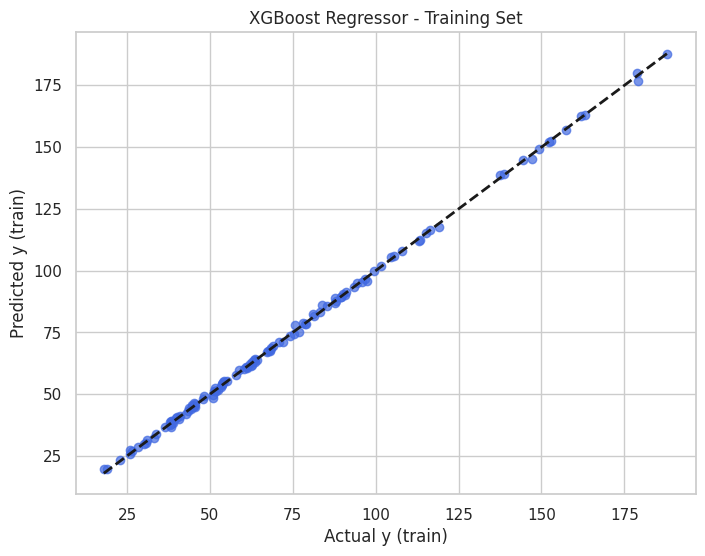

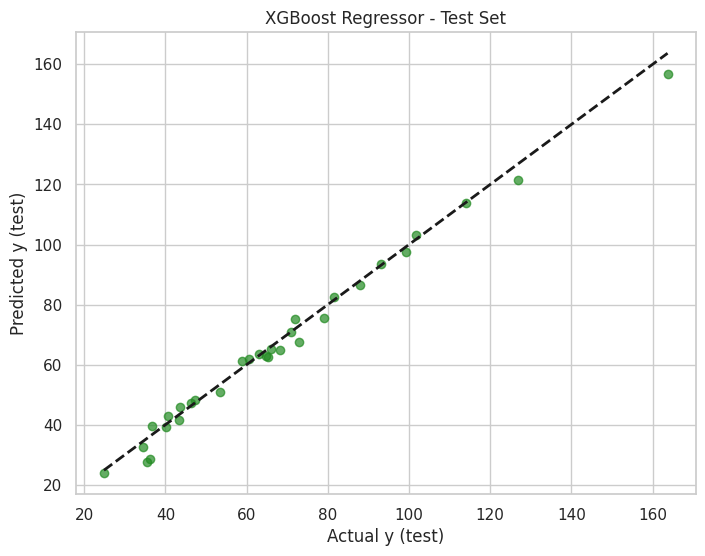

In [ ]:
# Training set predicted vs. actual
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred_xgb, color="royalblue", alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("Actual y (train)")
plt.ylabel("Predicted y (train)")
plt.title("XGBoost Regressor - Training Set")
plt.grid(True)
plt.show()

# Test set predicted vs. actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, color="forestgreen", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual y (test)")
plt.ylabel("Predicted y (test)")
plt.title("XGBoost Regressor - Test Set")
plt.grid(True)
plt.show()

#### XGBoost Efficiency

In [ ]:
def train_and_evaluate_xgb():
    # --- Training Phase ---
    start_train = time.time()

    def train_model():
        global best_xgb_model
        best_xgb_model = xgb.XGBRegressor(
            n_estimators=90, max_depth=3, learning_rate=0.12,
            subsample=0.7, colsample_bytree=0.8, random_state=42
        )
        best_xgb_model.fit(X_train, y_train)

    mem_usage_train = memory_usage(train_model, max_iterations=1)
    end_train = time.time()

    y_train_pred_xgb = best_xgb_model.predict(X_train)
    rmse_xgb_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
    r2_xgb_train = r2_score(y_train, y_train_pred_xgb)

    print(f"XGBoost - Training RMSE: {rmse_xgb_train:.4f}")
    print(f"XGBoost - Training R²: {r2_xgb_train:.4f}")
    print(f"-----Efficiency Info-----")
    print(f"XGBoost - Training Time: {end_train - start_train:.4f} sec")
    print(f"XGBoost - Peak Training Memory: {max(mem_usage_train):.2f} MiB")
    print("------------------------")

    # --- Testing Phase ---
    def predict_model():
        global y_pred_xgb
        y_pred_xgb = best_xgb_model.predict(X_test)

    start_test = time.time()
    mem_usage_test = memory_usage(predict_model, max_iterations=1)
    end_test = time.time()

    rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    r2_xgb = r2_score(y_test, y_pred_xgb)

    print(f"XGBoost - Test RMSE: {rmse_xgb:.4f}")
    print(f"XGBoost - Test R²: {r2_xgb:.4f}")
    print(f"-----Efficiency Info-----")
    print(f"XGBoost - Test Time: {end_test - start_test:.4f} sec")
    print(f"XGBoost - Peak Test Memory: {max(mem_usage_test):.2f} MiB")

# Run it
train_and_evaluate_xgb()


XGBoost - Training RMSE: 0.7961
XGBoost - Training R²: 0.9996
-----Efficiency Info-----
XGBoost - Training Time: 0.0710 sec
XGBoost - Peak Training Memory: 385.80 MiB
------------------------
XGBoost - Test RMSE: 3.2136
XGBoost - Test R²: 0.9887
-----Efficiency Info-----
XGBoost - Test Time: 0.0416 sec
XGBoost - Peak Test Memory: 385.80 MiB


### 4. ElasticNet Linear Regression

In [ ]:
# Define the ElasticNet Regressor model
en_model = ElasticNet(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_en = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9],
    'max_iter': [1000, 5000]
}

# Perform GridSearchCV
grid_search_en = GridSearchCV(en_model, param_grid_en, cv=5, scoring='neg_mean_squared_error')
grid_search_en.fit(X_train_scaled, y_train)

# Get the best parameters
best_en_params = grid_search_en.best_params_
print("\nBest ElasticNet Model Parameters:", best_en_params)


Best ElasticNet Model Parameters: {'alpha': 0.1, 'l1_ratio': 0.9, 'max_iter': 1000}


In [ ]:
# Get the best ElasticNet Regressor model
best_en_model = ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=1000, random_state=42)
best_en_model.fit(X_train_scaled, y_train)

# Evaluate the best model on the training dataset
y_train_pred_en = best_en_model.predict(X_train_scaled)

rmse_en_train = np.sqrt(mean_squared_error(y_train, y_train_pred_en))
r2_en_train = r2_score(y_train, y_train_pred_en)

print(f"ElasticNet - Training Root Mean Squared Error: {rmse_en_train:.4f}")
print(f"ElasticNet - Training R-squared: {r2_en_train:.4f}")

# Evaluate the best model on the test set
y_pred_en = best_en_model.predict(X_test_scaled)

rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
r2_en = r2_score(y_test, y_pred_en)

print(f"ElasticNet - Test Root Mean Squared Error: {rmse_en:.4f}")
print(f"ElasticNet - Test R-squared: {r2_en:.4f}")

ElasticNet - Training Root Mean Squared Error: 2.7709
ElasticNet - Training R-squared: 0.9946
ElasticNet - Test Root Mean Squared Error: 3.9436
ElasticNet - Test R-squared: 0.9829


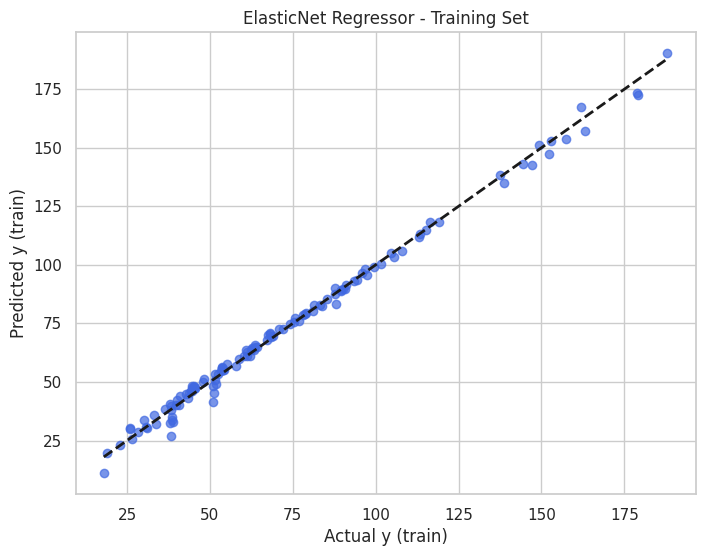

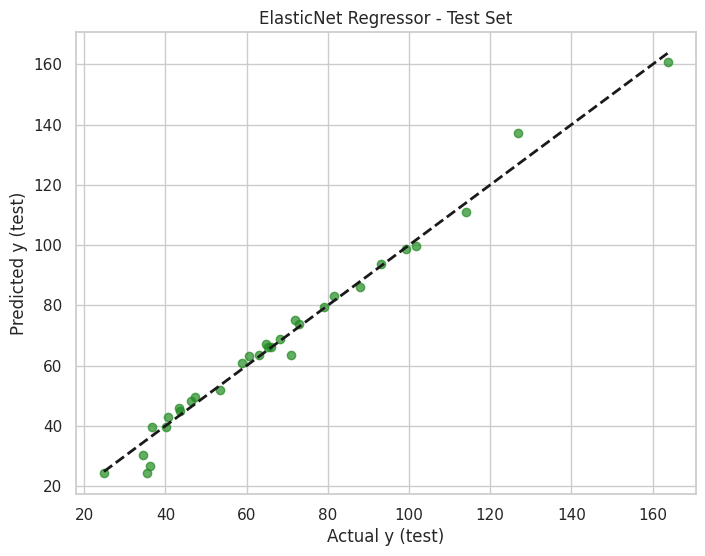

In [ ]:
# Training set predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred_en, color="royalblue", alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("Actual y (train)")
plt.ylabel("Predicted y (train)")
plt.title("ElasticNet Regressor - Training Set")
plt.grid(True)
plt.show()

# Test set predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_en, color="forestgreen", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual y (test)")
plt.ylabel("Predicted y (test)")
plt.title("ElasticNet Regressor - Test Set")
plt.grid(True)
plt.show()

#### ElasticNet Efficiency

In [ ]:
def train_and_evaluate_en():
    # --- Training Phase ---
    start_train = time.time()

    def train_model():
        global best_en_model
        best_en_model = ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=1000, random_state=42)
        best_en_model.fit(X_train_scaled, y_train)

    mem_usage_train = memory_usage(train_model, max_iterations=1)
    end_train = time.time()

    y_train_pred_en = best_en_model.predict(X_train_scaled)
    rmse_en_train = np.sqrt(mean_squared_error(y_train, y_train_pred_en))
    r2_en_train = r2_score(y_train, y_train_pred_en)

    print(f"ElasticNet - Training RMSE: {rmse_en_train:.4f}")
    print(f"ElasticNet - Training R²: {r2_en_train:.4f}")
    print(f"-----Efficiency Info-----")
    print(f"ElasticNet - Training Time: {end_train - start_train:.4f} sec")
    print(f"ElasticNet - Peak Training Memory: {max(mem_usage_train):.2f} MiB")
    print("------------------------")

    # --- Testing Phase ---
    def predict_model():
        global y_pred_en
        y_pred_en = best_en_model.predict(X_test_scaled)

    start_test = time.time()
    mem_usage_test = memory_usage(predict_model, max_iterations=1)
    end_test = time.time()

    rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
    r2_en = r2_score(y_test, y_pred_en)

    print(f"ElasticNet - Test RMSE: {rmse_en:.4f}")
    print(f"ElasticNet - Test R²: {r2_en:.4f}")
    print(f"-----Efficiency Info-----")
    print(f"ElasticNet - Test Time: {end_test - start_test:.4f} sec")
    print(f"ElasticNet - Peak Test Memory: {max(mem_usage_test):.2f} MiB")

# Run it
train_and_evaluate_en()


ElasticNet - Training RMSE: 2.7709
ElasticNet - Training R²: 0.9946
-----Efficiency Info-----
ElasticNet - Training Time: 0.0332 sec
ElasticNet - Peak Training Memory: 386.00 MiB
------------------------
ElasticNet - Test RMSE: 3.9436
ElasticNet - Test R²: 0.9829
-----Efficiency Info-----
ElasticNet - Test Time: 0.0322 sec
ElasticNet - Peak Test Memory: 386.00 MiB


### Ensembling method - Stacking Regressor

In [ ]:
# Wrap scaled models
svr_pipeline = make_pipeline(FunctionTransformer(lambda X: scaler.transform(X)), best_svr_model)
en_pipeline = make_pipeline(FunctionTransformer(lambda X: scaler.transform(X)), best_en_model)

# Define Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('svr', svr_pipeline),
        ('rf', best_rf_model),
        ('xgb', best_xgb_model),
        ('en', en_pipeline)
    ],
    final_estimator=LinearRegression()
)

# Fit on unscaled training data
stacking_regressor.fit(X_train, y_train)

# Predict and evaluate on test set
y_pred_stack_test = stacking_regressor.predict(X_test)
rmse_stack_test = np.sqrt(mean_squared_error(y_test, y_pred_stack_test))
r2_stack_test = r2_score(y_test, y_pred_stack_test)

# Predict and evaluate on training set
y_pred_stack_train = stacking_regressor.predict(X_train)
rmse_stack_train = np.sqrt(mean_squared_error(y_train, y_pred_stack_train))
r2_stack_train = r2_score(y_train, y_pred_stack_train)

# Output results
print(f"\nStacking Regressor - Training RMSE: {rmse_stack_train:.4f}")
print(f"Stacking Regressor - Training R²: {r2_stack_train:.4f}")
print(f"Stacking Regressor - Test RMSE: {rmse_stack_test:.4f}")
print(f"Stacking Regressor - Test R²: {r2_stack_test:.4f}")



Stacking Regressor - Training RMSE: 2.0469
Stacking Regressor - Training R²: 0.9971
Stacking Regressor - Test RMSE: 3.2004
Stacking Regressor - Test R²: 0.9888


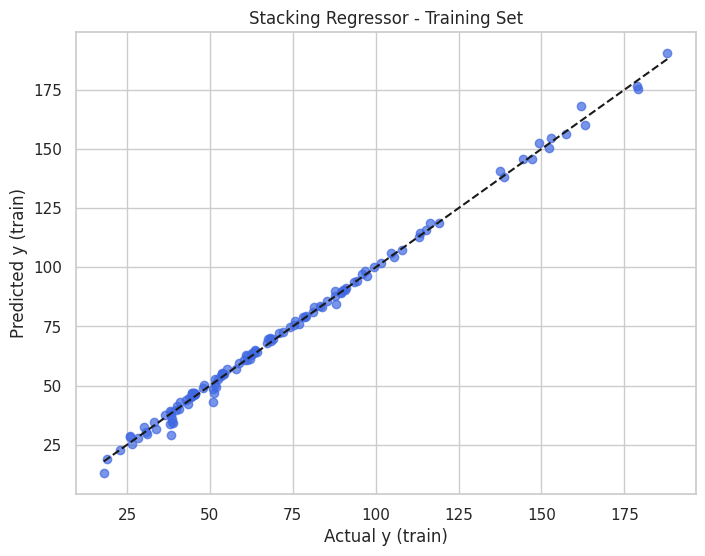

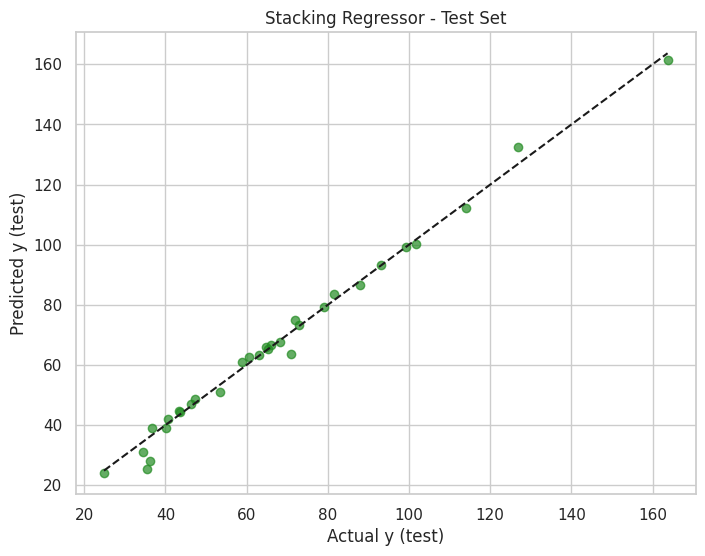

In [ ]:
# Training predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_pred_stack_train, color="royalblue", alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.xlabel("Actual y (train)")
plt.ylabel("Predicted y (train)")
plt.title("Stacking Regressor - Training Set")
plt.grid(True)
plt.show()

# Test predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_stack_test, color="forestgreen", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual y (test)")
plt.ylabel("Predicted y (test)")
plt.title("Stacking Regressor - Test Set")
plt.grid(True)
plt.show()

**Stacking Efficiency**

In [ ]:
# Wrap scaled models
svr_pipeline = make_pipeline(FunctionTransformer(lambda X: scaler.transform(X)), best_svr_model)
en_pipeline = make_pipeline(FunctionTransformer(lambda X: scaler.transform(X)), best_en_model)

# Define Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('svr', svr_pipeline),
        ('rf', best_rf_model),
        ('xgb', best_xgb_model),
        ('en', en_pipeline)
    ],
    final_estimator=LinearRegression()
)

# --- Training Efficiency ---
start_train = time.time()
def train_stack():
    stacking_regressor.fit(X_train, y_train)
mem_train = memory_usage(train_stack, max_iterations=1)
end_train = time.time()

# --- Prediction (Test) Efficiency ---
start_test = time.time()
def predict_stack():
    global y_pred_stack_test
    y_pred_stack_test = stacking_regressor.predict(X_test)
mem_test = memory_usage(predict_stack, max_iterations=1)
end_test = time.time()

# Predict on training set
y_pred_stack_train = stacking_regressor.predict(X_train)

# --- Evaluation ---
rmse_stack_train = np.sqrt(mean_squared_error(y_train, y_pred_stack_train))
r2_stack_train = r2_score(y_train, y_pred_stack_train)
rmse_stack_test = np.sqrt(mean_squared_error(y_test, y_pred_stack_test))
r2_stack_test = r2_score(y_test, y_pred_stack_test)

# --- Output ---
print(f"\nStacking Regressor - Training RMSE: {rmse_stack_train:.4f}")
print(f"Stacking Regressor - Training R²: {r2_stack_train:.4f}")
print("----- Efficiency Info -----")
print(f"Stacking Regressor - Training Time: {end_train - start_train:.4f} sec")
print(f"Stacking Regressor - Peak Training Memory: {max(mem_train):.2f} MiB")

print(f"\nStacking Regressor - Test RMSE: {rmse_stack_test:.4f}")
print(f"Stacking Regressor - Test R²: {r2_stack_test:.4f}")
print("----- Efficiency Info -----")
print(f"Stacking Regressor - Test Time: {end_test - start_test:.4f} sec")
print(f"Stacking Regressor - Peak Test Memory: {max(mem_test):.2f} MiB")



Stacking Regressor - Training RMSE: 2.0469
Stacking Regressor - Training R²: 0.9971
----- Efficiency Info -----
Stacking Regressor - Training Time: 5.3954 sec
Stacking Regressor - Peak Training Memory: 388.69 MiB

Stacking Regressor - Test RMSE: 3.2004
Stacking Regressor - Test R²: 0.9888
----- Efficiency Info -----
Stacking Regressor - Test Time: 0.0779 sec
Stacking Regressor - Peak Test Memory: 388.69 MiB


#### Alternative - Blending

In [ ]:
# --- True Blending Implementation with Training Accuracy ---

from sklearn.linear_model import LinearRegression

# Step 1: Split training into base and blend sets
X_base, X_blend, y_base, y_blend = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 2: Wrap scaled models
svr_pipeline = make_pipeline(FunctionTransformer(lambda X: scaler.transform(X)), best_svr_model)
en_pipeline = make_pipeline(FunctionTransformer(lambda X: scaler.transform(X)), best_en_model)

# Step 3: Train base models on base set
svr_pipeline.fit(X_base, y_base)
best_rf_model.fit(X_base, y_base)
best_xgb_model.fit(X_base, y_base)
en_pipeline.fit(X_base, y_base)

# Step 4: Predict on blend set → used as input features for meta-model
blend_X = np.column_stack([
    svr_pipeline.predict(X_blend),
    best_rf_model.predict(X_blend),
    best_xgb_model.predict(X_blend),
    en_pipeline.predict(X_blend)
])

# Step 5: Train meta-model on blend predictions
meta_model = LinearRegression()
meta_model.fit(blend_X, y_blend)

# Step 6a: Evaluate on blend (training for meta-model)
train_blend_pred = meta_model.predict(blend_X)
rmse_blend_train = np.sqrt(mean_squared_error(y_blend, train_blend_pred))
r2_blend_train = r2_score(y_blend, train_blend_pred)

# Step 6b: Predict on test set using base models
test_meta_input = np.column_stack([
    svr_pipeline.predict(X_test),
    best_rf_model.predict(X_test),
    best_xgb_model.predict(X_test),
    en_pipeline.predict(X_test)
])

# Step 7: Final prediction using meta-model
blended_pred = meta_model.predict(test_meta_input)

# Step 8: Evaluate test performance
rmse_blend_test = np.sqrt(mean_squared_error(y_test, blended_pred))
r2_blend_test = r2_score(y_test, blended_pred)

# Print both results
print(f"\nBlended Model (Meta) - Training RMSE: {rmse_blend_train:.4f}")
print(f"Blended Model (Meta) - Training R²: {r2_blend_train:.4f}")
print(f"Blended Model (Meta) - Test RMSE: {rmse_blend_test:.4f}")
print(f"Blended Model (Meta) - Test R²: {r2_blend_test:.4f}")



Blended Model (Meta) - Training RMSE: 2.8811
Blended Model (Meta) - Training R²: 0.9968
Blended Model (Meta) - Test RMSE: 4.1108
Blended Model (Meta) - Test R²: 0.9815


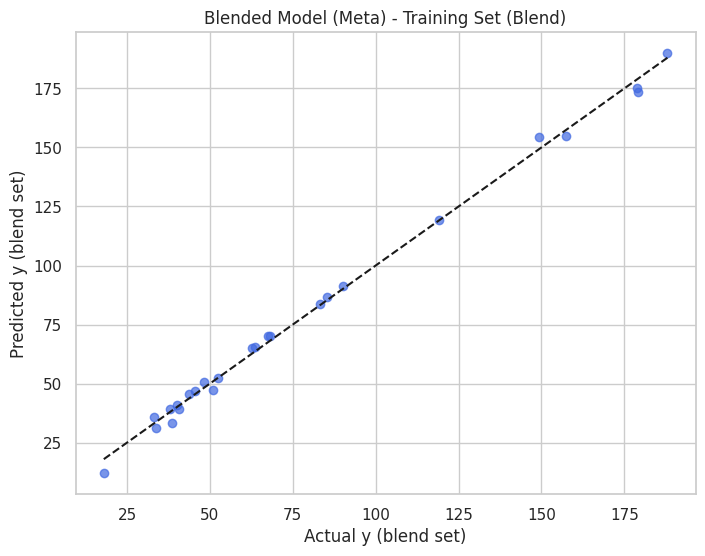

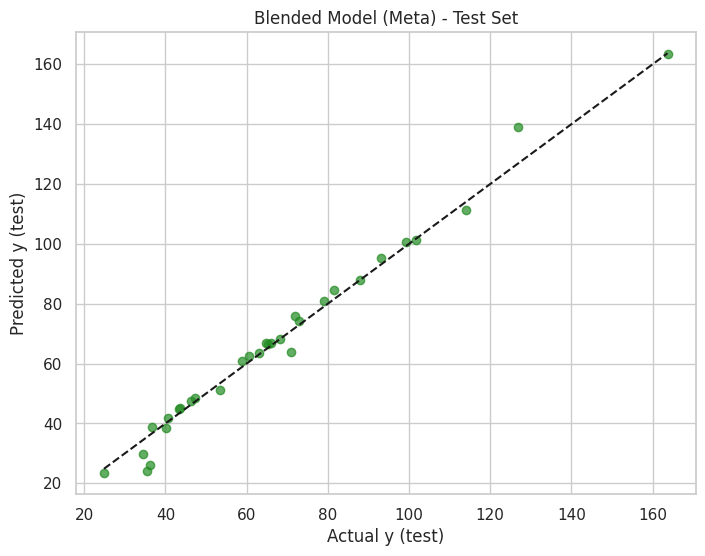

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_blend, train_blend_pred, color="royalblue", alpha=0.7)
plt.plot([y_blend.min(), y_blend.max()], [y_blend.min(), y_blend.max()], 'k--')
plt.xlabel("Actual y (blend set)")
plt.ylabel("Predicted y (blend set)")
plt.title("Blended Model (Meta) - Training Set (Blend)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(y_test, blended_pred, color="forestgreen", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual y (test)")
plt.ylabel("Predicted y (test)")
plt.title("Blended Model (Meta) - Test Set")
plt.grid(True)
plt.show()

**Blending Efficiency**

In [ ]:
# --- True Blending with Efficiency Analysis ---

# Step 1: Split training into base and blend sets
X_base, X_blend, y_base, y_blend = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 2: Wrap scaled models
svr_pipeline = make_pipeline(FunctionTransformer(lambda X: scaler.transform(X)), best_svr_model)
en_pipeline = make_pipeline(FunctionTransformer(lambda X: scaler.transform(X)), best_en_model)

# --- Efficiency for Base Model Training ---
start_train = time.time()
def train_blend_base():
    svr_pipeline.fit(X_base, y_base)
    best_rf_model.fit(X_base, y_base)
    best_xgb_model.fit(X_base, y_base)
    en_pipeline.fit(X_base, y_base)
mem_train = memory_usage(train_blend_base, max_iterations=1)
end_train = time.time()

# Step 3: Predict on blend set for meta-model input
blend_X = np.column_stack([
    svr_pipeline.predict(X_blend),
    best_rf_model.predict(X_blend),
    best_xgb_model.predict(X_blend),
    en_pipeline.predict(X_blend)
])

# Step 4: Train meta-model
meta_model = LinearRegression()
meta_model.fit(blend_X, y_blend)

# Step 5a: Evaluate on blend set (training performance)
train_blend_pred = meta_model.predict(blend_X)
rmse_blend_train = np.sqrt(mean_squared_error(y_blend, train_blend_pred))
r2_blend_train = r2_score(y_blend, train_blend_pred)

# --- Efficiency for Final Prediction ---
start_test = time.time()
def predict_blend_test():
    global blended_pred
    test_meta_input = np.column_stack([
        svr_pipeline.predict(X_test),
        best_rf_model.predict(X_test),
        best_xgb_model.predict(X_test),
        en_pipeline.predict(X_test)
    ])
    blended_pred = meta_model.predict(test_meta_input)

mem_test = memory_usage(predict_blend_test, max_iterations=1)
end_test = time.time()

# Step 5b: Evaluate on test set
rmse_blend_test = np.sqrt(mean_squared_error(y_test, blended_pred))
r2_blend_test = r2_score(y_test, blended_pred)

# --- Output ---
print(f"\nBlended Model (Meta) - Training RMSE: {rmse_blend_train:.4f}")
print(f"Blended Model (Meta) - Training R²: {r2_blend_train:.4f}")
print("----- Efficiency Info -----")
print(f"Blending - Training Time: {end_train - start_train:.4f} sec")
print(f"Blending - Peak Training Memory: {max(mem_train):.2f} MiB")

print(f"\nBlended Model (Meta) - Test RMSE: {rmse_blend_test:.4f}")
print(f"Blended Model (Meta) - Test R²: {r2_blend_test:.4f}")
print("----- Efficiency Info -----")
print(f"Blending - Test Time: {end_test - start_test:.4f} sec")
print(f"Blending - Peak Test Memory: {max(mem_test):.2f} MiB")



Blended Model (Meta) - Training RMSE: 2.8811
Blended Model (Meta) - Training R²: 0.9968
----- Efficiency Info -----
Blending - Training Time: 0.7045 sec
Blending - Peak Training Memory: 388.75 MiB

Blended Model (Meta) - Test RMSE: 4.1108
Blended Model (Meta) - Test R²: 0.9815
----- Efficiency Info -----
Blending - Test Time: 0.0801 sec
Blending - Peak Test Memory: 388.75 MiB


#### Alternative - Confidence Switching

In [ ]:
# --- Confidence Switching Only (Per Sample) with Training Accuracy ---

# Wrap scaled models
svr_pipeline = make_pipeline(FunctionTransformer(lambda X: scaler.transform(X)), best_svr_model)
en_pipeline = make_pipeline(FunctionTransformer(lambda X: scaler.transform(X)), best_en_model)

# Fit models
svr_pipeline.fit(X_train, y_train)
best_rf_model.fit(X_train, y_train)
best_xgb_model.fit(X_train, y_train)
en_pipeline.fit(X_train, y_train)

# Calculate RMSEs (used to determine model confidence)
svr_rmse = np.sqrt(mean_squared_error(y_train, svr_pipeline.predict(X_train)))
rf_rmse = np.sqrt(mean_squared_error(y_train, best_rf_model.predict(X_train)))
xgb_rmse = np.sqrt(mean_squared_error(y_train, best_xgb_model.predict(X_train)))
en_rmse = np.sqrt(mean_squared_error(y_train, en_pipeline.predict(X_train)))

model_errors = [svr_rmse, rf_rmse, xgb_rmse, en_rmse]
models = [svr_pipeline, best_rf_model, best_xgb_model, en_pipeline]

# Predict for each model on test set
svr_pred_test = svr_pipeline.predict(X_test)
rf_pred_test = best_rf_model.predict(X_test)
xgb_pred_test = best_xgb_model.predict(X_test)
en_pred_test = en_pipeline.predict(X_test)

# Predict for each model on training set
svr_pred_train = svr_pipeline.predict(X_train)
rf_pred_train = best_rf_model.predict(X_train)
xgb_pred_train = best_xgb_model.predict(X_train)
en_pred_train = en_pipeline.predict(X_train)

# Confidence switching on TEST
pred_matrix_test = np.vstack([svr_pred_test, rf_pred_test, xgb_pred_test, en_pred_test])
final_preds_test = []

for i in range(X_test.shape[0]):
    preds = pred_matrix_test[:, i]
    pred_range = preds.max() - preds.min()
    if pred_range <= 5.0:
        final_preds_test.append(np.mean(preds))
    else:
        best_model_idx = np.argmin(model_errors)
        final_preds_test.append(preds[best_model_idx])

# Confidence switching on TRAIN
pred_matrix_train = np.vstack([svr_pred_train, rf_pred_train, xgb_pred_train, en_pred_train])
final_preds_train = []

for i in range(X_train.shape[0]):
    preds = pred_matrix_train[:, i]
    pred_range = preds.max() - preds.min()
    if pred_range <= 5.0:
        final_preds_train.append(np.mean(preds))
    else:
        best_model_idx = np.argmin(model_errors)
        final_preds_train.append(preds[best_model_idx])

# Evaluate test performance
rmse_switch_test = np.sqrt(mean_squared_error(y_test, final_preds_test))
r2_switch_test = r2_score(y_test, final_preds_test)

# Evaluate train performance
rmse_switch_train = np.sqrt(mean_squared_error(y_train, final_preds_train))
r2_switch_train = r2_score(y_train, final_preds_train)

# Print results
print(f"\nConfidence Switching - Training RMSE: {rmse_switch_train:.4f}")
print(f"Confidence Switching - Training R²: {r2_switch_train:.4f}")
print(f"Confidence Switching - Test RMSE: {rmse_switch_test:.4f}")
print(f"Confidence Switching - Test R²: {r2_switch_test:.4f}")



Confidence Switching - Training RMSE: 1.0667
Confidence Switching - Training R²: 0.9992
Confidence Switching - Test RMSE: 2.9711
Confidence Switching - Test R²: 0.9903


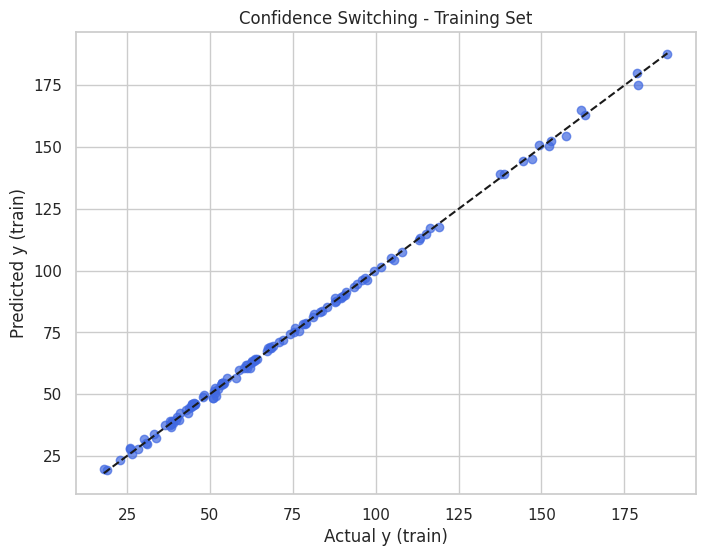

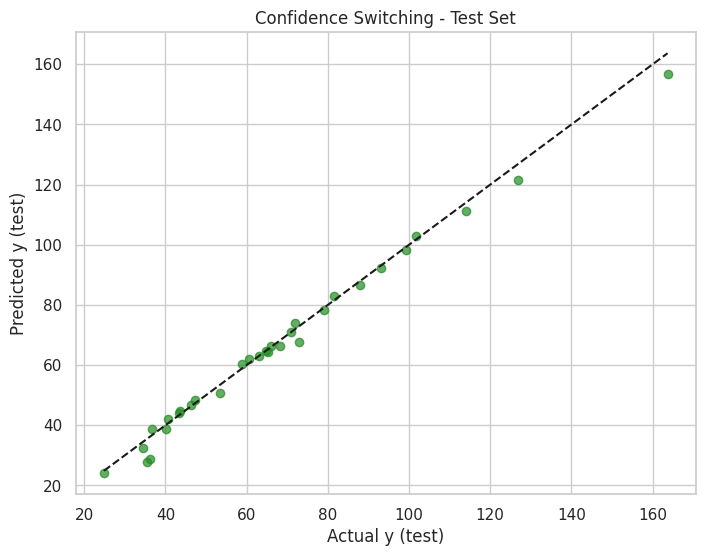

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, final_preds_train, color="royalblue", alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.xlabel("Actual y (train)")
plt.ylabel("Predicted y (train)")
plt.title("Confidence Switching - Training Set")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(y_test, final_preds_test, color="forestgreen", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual y (test)")
plt.ylabel("Predicted y (test)")
plt.title("Confidence Switching - Test Set")
plt.grid(True)
plt.show()

**Confidence Switching Efficiency**

In [ ]:
# --- Confidence Switching with Efficiency ---

# Wrap scaled models
svr_pipeline = make_pipeline(FunctionTransformer(lambda X: scaler.transform(X)), best_svr_model)
en_pipeline = make_pipeline(FunctionTransformer(lambda X: scaler.transform(X)), best_en_model)

# --- Efficiency: Training ---
start_train = time.time()
def train_models():
    svr_pipeline.fit(X_train, y_train)
    best_rf_model.fit(X_train, y_train)
    best_xgb_model.fit(X_train, y_train)
    en_pipeline.fit(X_train, y_train)
mem_train = memory_usage(train_models, max_iterations=1)
end_train = time.time()

# Calculate model errors (for confidence switching)
svr_rmse = np.sqrt(mean_squared_error(y_train, svr_pipeline.predict(X_train)))
rf_rmse = np.sqrt(mean_squared_error(y_train, best_rf_model.predict(X_train)))
xgb_rmse = np.sqrt(mean_squared_error(y_train, best_xgb_model.predict(X_train)))
en_rmse = np.sqrt(mean_squared_error(y_train, en_pipeline.predict(X_train)))

model_errors = [svr_rmse, rf_rmse, xgb_rmse, en_rmse]

# Predict on both sets
svr_pred_test = svr_pipeline.predict(X_test)
rf_pred_test = best_rf_model.predict(X_test)
xgb_pred_test = best_xgb_model.predict(X_test)
en_pred_test = en_pipeline.predict(X_test)

svr_pred_train = svr_pipeline.predict(X_train)
rf_pred_train = best_rf_model.predict(X_train)
xgb_pred_train = best_xgb_model.predict(X_train)
en_pred_train = en_pipeline.predict(X_train)

# Confidence switching on TRAIN
pred_matrix_train = np.vstack([svr_pred_train, rf_pred_train, xgb_pred_train, en_pred_train])
final_preds_train = []

for i in range(X_train.shape[0]):
    preds = pred_matrix_train[:, i]
    pred_range = preds.max() - preds.min()
    if pred_range <= 5.0:
        final_preds_train.append(np.mean(preds))
    else:
        best_model_idx = np.argmin(model_errors)
        final_preds_train.append(preds[best_model_idx])

# --- Efficiency: Testing ---
start_test = time.time()
def apply_conf_switch_test():
    global final_preds_test
    final_preds_test = []
    pred_matrix_test = np.vstack([svr_pred_test, rf_pred_test, xgb_pred_test, en_pred_test])
    for i in range(X_test.shape[0]):
        preds = pred_matrix_test[:, i]
        pred_range = preds.max() - preds.min()
        if pred_range <= 5.0:
            final_preds_test.append(np.mean(preds))
        else:
            best_model_idx = np.argmin(model_errors)
            final_preds_test.append(preds[best_model_idx])

mem_test = memory_usage(apply_conf_switch_test, max_iterations=1)
end_test = time.time()

# Evaluate performance
rmse_switch_train = np.sqrt(mean_squared_error(y_train, final_preds_train))
r2_switch_train = r2_score(y_train, final_preds_train)

rmse_switch_test = np.sqrt(mean_squared_error(y_test, final_preds_test))
r2_switch_test = r2_score(y_test, final_preds_test)

# --- Output ---
print(f"\nConfidence Switching - Training RMSE: {rmse_switch_train:.4f}")
print(f"Confidence Switching - Training R²: {r2_switch_train:.4f}")
print("----- Efficiency Info -----")
print(f"Training Time: {end_train - start_train:.4f} sec")
print(f"Peak Training Memory: {max(mem_train):.2f} MiB")

print(f"\nConfidence Switching - Test RMSE: {rmse_switch_test:.4f}")
print(f"Confidence Switching - Test R²: {r2_switch_test:.4f}")
print("----- Efficiency Info -----")
print(f"Test Time: {end_test - start_test:.4f} sec")
print(f"Peak Test Memory: {max(mem_test):.2f} MiB")



Confidence Switching - Training RMSE: 1.0667
Confidence Switching - Training R²: 0.9992
----- Efficiency Info -----
Training Time: 0.7504 sec
Peak Training Memory: 388.75 MiB

Confidence Switching - Test RMSE: 2.9711
Confidence Switching - Test R²: 0.9903
----- Efficiency Info -----
Test Time: 0.0295 sec
Peak Test Memory: 388.75 MiB


#### Alternative - Voting

In [ ]:
# Wrap SVR and EN with scaler
svr_pipeline = make_pipeline(FunctionTransformer(lambda X: scaler.transform(X)), best_svr_model)
en_pipeline = make_pipeline(FunctionTransformer(lambda X: scaler.transform(X)), best_en_model)

# Define the Voting Regressor with all 4 models
voting_reg = VotingRegressor(
    estimators=[
        ('svr', svr_pipeline),
        ('rf', best_rf_model),
        ('xgb', best_xgb_model),
        ('en', en_pipeline)
    ]
)

# Fit on training data
voting_reg.fit(X_train, y_train)

# Predict on training set
voting_pred_train = voting_reg.predict(X_train)
rmse_vote_train = np.sqrt(mean_squared_error(y_train, voting_pred_train))
r2_vote_train = r2_score(y_train, voting_pred_train)

# Predict on test set
voting_pred_test = voting_reg.predict(X_test)
rmse_vote_test = np.sqrt(mean_squared_error(y_test, voting_pred_test))
r2_vote_test = r2_score(y_test, voting_pred_test)

# Print results
print(f"\nVoting Regressor - Training RMSE: {rmse_vote_train:.4f}")
print(f"Voting Regressor - Training R²: {r2_vote_train:.4f}")
print(f"Voting Regressor - Test RMSE: {rmse_vote_test:.4f}")
print(f"Voting Regressor - Test R²: {r2_vote_test:.4f}")



Voting Regressor - Training RMSE: 1.6439
Voting Regressor - Training R²: 0.9981
Voting Regressor - Test RMSE: 3.0705
Voting Regressor - Test R²: 0.9897


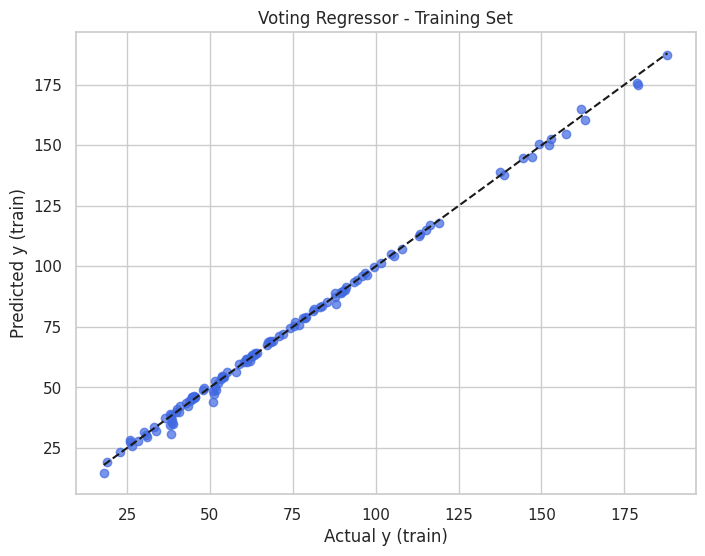

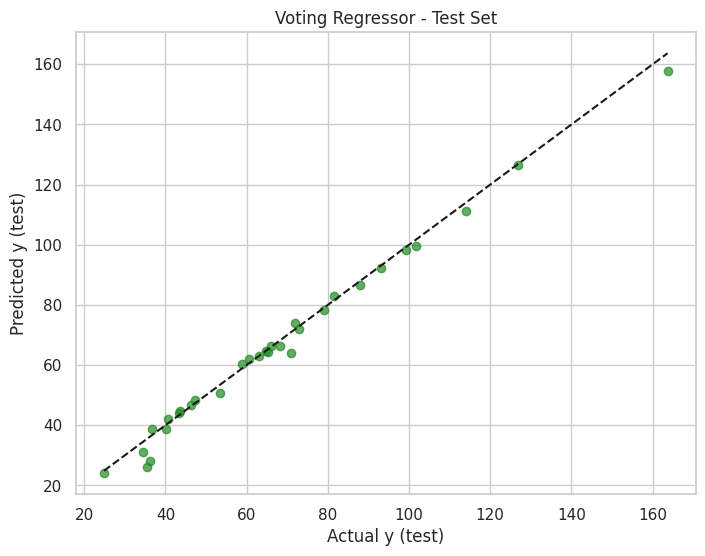

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, voting_pred_train, color="royalblue", alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.xlabel("Actual y (train)")
plt.ylabel("Predicted y (train)")
plt.title("Voting Regressor - Training Set")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(y_test, voting_pred_test, color="forestgreen", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual y (test)")
plt.ylabel("Predicted y (test)")
plt.title("Voting Regressor - Test Set")
plt.grid(True)
plt.show()

Voting Efficiency

In [ ]:
# Wrap SVR and EN with scaler
svr_pipeline = make_pipeline(FunctionTransformer(lambda X: scaler.transform(X)), best_svr_model)
en_pipeline = make_pipeline(FunctionTransformer(lambda X: scaler.transform(X)), best_en_model)

# Define the Voting Regressor with all 4 models
voting_reg = VotingRegressor(
    estimators=[
        ('svr', svr_pipeline),
        ('rf', best_rf_model),
        ('xgb', best_xgb_model),
        ('en', en_pipeline)
    ]
)

# --- Efficiency: Training ---
start_train = time.time()
def train_voting():
    voting_reg.fit(X_train, y_train)
mem_train = memory_usage(train_voting, max_iterations=1)
end_train = time.time()

# --- Efficiency: Testing ---
start_test = time.time()
def predict_voting():
    global voting_pred_test
    voting_pred_test = voting_reg.predict(X_test)
mem_test = memory_usage(predict_voting, max_iterations=1)
end_test = time.time()

# Predict on training set
voting_pred_train = voting_reg.predict(X_train)
rmse_vote_train = np.sqrt(mean_squared_error(y_train, voting_pred_train))
r2_vote_train = r2_score(y_train, voting_pred_train)

# Evaluate test predictions (already generated)
rmse_vote_test = np.sqrt(mean_squared_error(y_test, voting_pred_test))
r2_vote_test = r2_score(y_test, voting_pred_test)

# --- Output Results ---
print(f"\nVoting Regressor - Training RMSE: {rmse_vote_train:.4f}")
print(f"Voting Regressor - Training R²: {r2_vote_train:.4f}")
print("----- Efficiency Info -----")
print(f"Training Time: {end_train - start_train:.4f} sec")
print(f"Peak Training Memory: {max(mem_train):.2f} MiB")

print(f"\nVoting Regressor - Test RMSE: {rmse_vote_test:.4f}")
print(f"Voting Regressor - Test R²: {r2_vote_test:.4f}")
print("----- Efficiency Info -----")
print(f"Test Time: {end_test - start_test:.4f} sec")
print(f"Peak Test Memory: {max(mem_test):.2f} MiB")



Voting Regressor - Training RMSE: 1.6439
Voting Regressor - Training R²: 0.9981
----- Efficiency Info -----
Training Time: 0.7779 sec
Peak Training Memory: 390.32 MiB

Voting Regressor - Test RMSE: 3.0705
Voting Regressor - Test R²: 0.9897
----- Efficiency Info -----
Test Time: 0.0773 sec
Peak Test Memory: 390.32 MiB


# AQI Based Recommender System

In [ ]:
def make_recommendation(country_data):
    """
    Generates recommendations based on a country's AQI, energy sources, and energy consumption.

    Args:
        country_data (pd.Series): A row from the merged DataFrame containing data for a specific country.

    Returns:
        str: A string containing the recommendation for the country.
    """
    recommendations = []

    aqi_value = country_data['AQI Average Value']
    fossil_fuel_twh = country_data['Electricity from fossil fuels (TWh)']
    renewables_twh = country_data['Electricity from renewables (TWh)']
    per_capita_consumption = country_data['Primary energy consumption per capita (kWh/person)']

    # Recommendation based on AQI and energy mix
    if aqi_value > 100: # Threshold for high AQI
        if fossil_fuel_twh > renewables_twh:
            recommendations.append("The country has a high average AQI and relies more on fossil fuels than renewables for electricity. It is highly recommended to invest significantly in renewable energy sources to improve air quality.")
        elif fossil_fuel_twh > 0:
             recommendations.append("The country has a high average AQI and still uses fossil fuels for electricity. Transitioning towards renewable energy sources should be a priority to reduce air pollution.")
        else:
             recommendations.append("The country has a high average AQI despite having a low reliance on fossil fuels. Other factors might be contributing significantly to air pollution, such as industrial emissions or vehicle traffic. Further investigation into specific pollution sources is needed.")

    elif aqi_value > 50: # Threshold for moderate AQI
        if fossil_fuel_twh > renewables_twh:
            recommendations.append("The country has a moderate average AQI and currently uses more fossil fuels than renewables. Gradually increasing the share of renewable energy can help prevent future increases in air pollution.")
        elif fossil_fuel_twh > 0:
            recommendations.append("The country has a moderate average AQI and uses some fossil fuels. Continuing to increase the adoption of renewable energy sources is advisable for long-term air quality improvement.")
        else:
            recommendations.append("The country has a moderate average AQI and low reliance on fossil fuels. Focusing on reducing other sources of pollution is important to maintain and improve air quality.")
    else: # Low AQI
        if fossil_fuel_twh > renewables_twh:
             recommendations.append("The country has a low average AQI but still generates more electricity from fossil fuels than renewables. While air quality is currently good, increasing renewable energy adoption would be beneficial for long-term environmental sustainability.")
        elif fossil_fuel_twh > 0:
            recommendations.append("The country has a low average AQI and uses some fossil fuels. Continued efforts to increase renewable energy use can further solidify good air quality.")
        else:
            recommendations.append("The country enjoys low average AQI and already has low reliance on fossil fuels. This is a positive position, and maintaining a focus on clean energy is recommended.")


    # Recommendation based on primary energy consumption per capita
    # Define a threshold for high consumption
    high_consumption_threshold = 30000  # kWh/person

    if per_capita_consumption > high_consumption_threshold:
        recommendations.append(f"Primary energy consumption per capita ({per_capita_consumption:.2f} kWh/person) is relatively high. Strategies to optimize energy efficiency and promote responsible consumption should be explored.")
    elif per_capita_consumption < 10000: # Threshold for low consumption
         recommendations.append(f"Primary energy consumption per capita ({per_capita_consumption:.2f} kWh/person) is relatively low. Efforts could focus on ensuring energy access and developing sustainable infrastructure to meet growing needs.")
    else:
         recommendations.append(f"Primary energy consumption per capita ({per_capita_consumption:.2f} kWh/person) is within a moderate range. Continuing to promote energy efficiency and sustainable practices is recommended.")


    if not recommendations:
        return "No specific recommendations based on the current data."
    else:
        return " ".join(recommendations)

# Apply the recommendation function to each row of the merged dataframe
df['Recommendation'] = df.apply(make_recommendation, axis=1)

# Final Implemenation

In [ ]:
# Sample by country
country_name = input('Write a country name here: ')
if country_name in df['Country'].values:
    country_rec = df[df['Country'] == country_name]['Recommendation'].iloc[0]

    print(f"\nRecommendation for {country_name}:")
    # Split the recommendation string into sentences and print each on a new line
    for sentence in country_rec.split('. '):
        if sentence.strip():
            print(f"- {sentence.strip()}.")
else:
    print(f"\nData for {country_name} not found in the merged dataset.")


Write a country name here: Indonesia

Recommendation for Indonesia:
- The country has a moderate average AQI and currently uses more fossil fuels than renewables.
- Gradually increasing the share of renewable energy can help prevent future increases in air pollution.
- Primary energy consumption per capita (7771.04 kWh/person) is relatively low.
- Efforts could focus on ensuring energy access and developing sustainable infrastructure to meet growing needs..


In [ ]:
# Prompt user for input values with examples
print("Enter values for a new country (example: Indonesia)\n")

country_name = input("Country name (e.g., Indonesia): ")
co_aqi = float(input("CO AQI Average Value (e.g., 50.0): "))
ozone_aqi = float(input("Ozone AQI Average Value (e.g., 40.0): "))
no2_aqi = float(input("NO2 AQI Average Value (e.g., 25.0): "))
pm25_aqi = float(input("PM2.5 AQI Average Value (e.g., 30.0): "))
fossil = float(input("Electricity from fossil fuels (TWh) (e.g., 500.0): "))
nuclear = float(input("Electricity from nuclear (TWh) (e.g., 50.0): "))
renewables = float(input("Electricity from renewables (TWh) (e.g., 200.0): "))
per_capita = float(input("Primary energy consumption per capita (kWh/person) (e.g., 25000.0): "))

# Prepare the input data
new_country_data = {
    'CO AQI Average Value': [co_aqi],
    'Ozone AQI Average Value': [ozone_aqi],
    'NO2 AQI Average Value': [no2_aqi],
    'PM2.5 AQI Average Value': [pm25_aqi],
    'Electricity from fossil fuels (TWh)': [fossil],
    'Electricity from nuclear (TWh)': [nuclear],
    'Electricity from renewables (TWh)': [renewables],
    'Primary energy consumption per capita (kWh/person)': [per_capita]
}

# Create DataFrame
X_new = pd.DataFrame(new_country_data)
X_new = X_new[features]  # Reorder to match training features

# Predict AQI
predicted_aqi = stacking_regressor.predict(X_new)[0]
print(f"\nPredicted AQI for {country_name}: {predicted_aqi:.2f}")

# Build full row for recommendation function
new_country_row = pd.Series({
    'Country': country_name,
    'AQI Average Value': predicted_aqi,
    'CO AQI Average Value': co_aqi,
    'Ozone AQI Average Value': ozone_aqi,
    'NO2 AQI Average Value': no2_aqi,
    'PM2.5 AQI Average Value': pm25_aqi,
    'Electricity from fossil fuels (TWh)': fossil,
    'Electricity from nuclear (TWh)': nuclear,
    'Electricity from renewables (TWh)': renewables,
    'Primary energy consumption per capita (kWh/person)': per_capita
})

# Generate recommendation
recommendation = make_recommendation(new_country_row)
print(f"\nRecommendation for {country_name}:\n{recommendation}")


Enter values for a new country (example: Indonesia)

Country name (e.g., Indonesia): Indonesia
CO AQI Average Value (e.g., 50.0): 40
Ozone AQI Average Value (e.g., 40.0): 20
NO2 AQI Average Value (e.g., 25.0): 50
PM2.5 AQI Average Value (e.g., 30.0): 15
Electricity from fossil fuels (TWh) (e.g., 500.0): 700
Electricity from nuclear (TWh) (e.g., 50.0): 36
Electricity from renewables (TWh) (e.g., 200.0): 120
Primary energy consumption per capita (kWh/person) (e.g., 25000.0): 3000

Predicted AQI for Indonesia: 28.11

Recommendation for Indonesia:
The country has a low average AQI but still generates more electricity from fossil fuels than renewables. While air quality is currently good, increasing renewable energy adoption would be beneficial for long-term environmental sustainability. Primary energy consumption per capita (3000.00 kWh/person) is relatively low. Efforts could focus on ensuring energy access and developing sustainable infrastructure to meet growing needs.
